# Apply smoothening spatial filters on an image
1. Box Filter
2. Weighted Filter
3. Median Filter

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

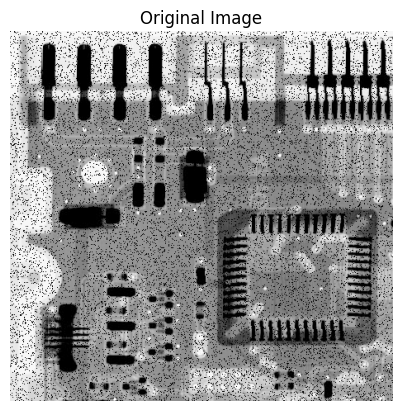

In [6]:
img = cv2.imread("DIP3E_CH05_Original_Images/Fig0508(a)(circuit-board-pepper-prob-pt1).tif",cv2.IMREAD_GRAYSCALE)
plt.title("Original Image")
plt.axis("off")
plt.imshow(img,cmap = 'gray')
plt.show()

# Convolution without using filter2D() built-in method

In [27]:
# Step 1
def calculate_target_size(img, kernels, padding, stride):
    # There is a formula which tells what would be the output shape of the image when we give
    # it the original image shape, kernel size/convolution matrix size, padding and stride information
    # the formula is (W - K + 2P / S ) + 1
    # W => Image Size
    # K => Kernel Size or Convolution Image Size
    # P => Padding
    # S => Stride
    # here the image shape should be even that is a square shaped image

    # Here we will consider Stride = 1 and Padding = 0 for simplicity and kernel size = 3
    W = img.shape[0]
    output_shape = ((W - kernels + (2 * padding)) / stride) + 1
    return output_shape

In [28]:
# Step 2
def convolve_from_scratch(original_image,kernel):
    # Defining the kernel size
    k = 3
    target_size = int(calculate_target_size(original_image,kernels= k ,padding = 0, stride = 1))
    # Initialize the output convolved image  
    convolved_image = np.zeros([target_size,target_size])
    for i in range(target_size):
        for j in range(target_size):
            mat = original_image[i:i + k , j : j + k]
            convolved_image[i][j] = np.sum(np.multiply(mat,kernel))
    return convolved_image

1. Box Filter

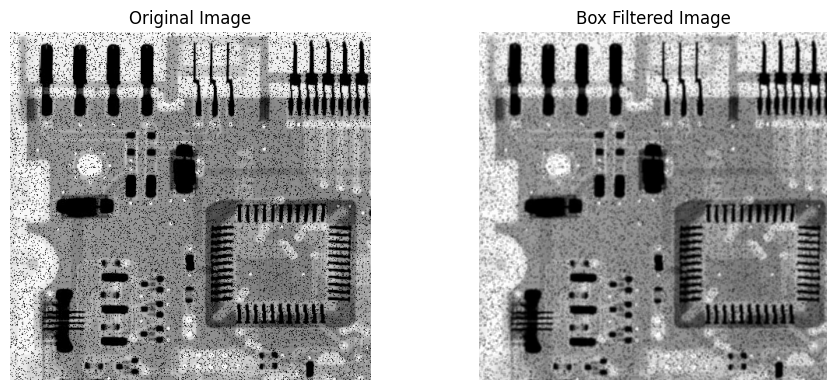

In [29]:
# Box filter is used to Blur and remove noise from an image.
box_filter = (1/9) * np.array([[1,1,1],
                              [1,1,1],
                             [1,1,1]])
box_filtered_image = convolve_from_scratch(img,box_filter) 
# Or use
# box_filtered_image = cv2.filter2D(img,-1,box_filter) -> Inbuilt function
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.axis("off")
plt.tight_layout()
plt.imshow(img,cmap = "gray")

plt.subplot(1,2,2)
plt.title('Box Filtered Image')
plt.axis("off")
plt.tight_layout()
plt.imshow(box_filtered_image,cmap = "gray")

plt.show()

2. Median Filter

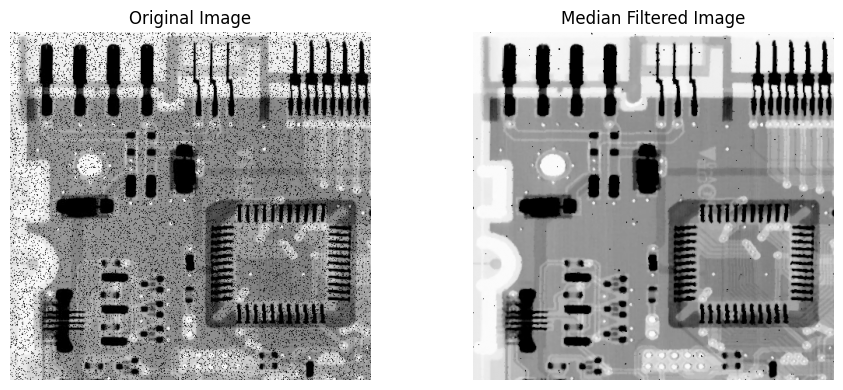

In [30]:
# Median filter is used to remove the salt and pepper noise from an image.
kernel_size = 3
median_filtered_image = cv2.medianBlur(img,ksize = kernel_size)

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.axis("off")
plt.tight_layout()
plt.imshow(img,cmap = "gray")

plt.subplot(1,2,2)
plt.title('Median Filtered Image')
plt.axis("off")
plt.tight_layout()
plt.imshow(median_filtered_image,cmap = "gray")

plt.show()

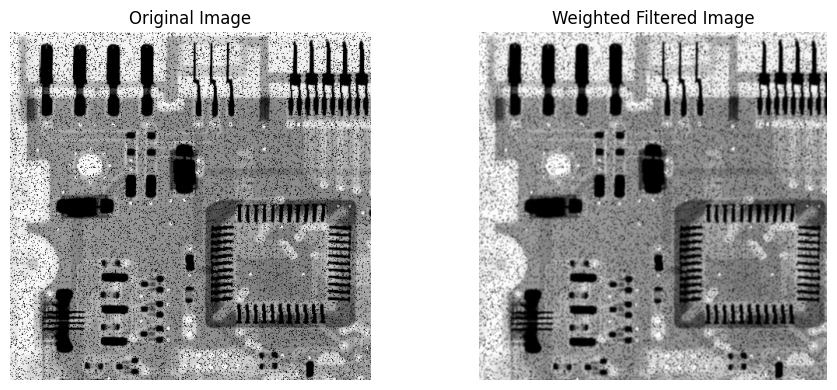

In [19]:
# Box filter is used to Blur and remove noise from an image.
weighted_kernel =   np.array([[1,2,1],
                              [2,4,2],
                             [1,2,1]], dtype = np.float32)
weighted_kernel /= weighted_kernel.sum()
weighted_filtered_image = convolve_from_scratch(img,weighted_kernel) 
# Or use
# box_filtered_image = cv2.filter2D(img,-1,box_filter) -> Inbuilt function
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.axis("off")
plt.tight_layout()
plt.imshow(img,cmap = "gray")

plt.subplot(1,2,2)
plt.title('Weighted Filtered Image')
plt.axis("off")
plt.tight_layout()
plt.imshow(weighted_filtered_image,cmap = "gray")

plt.show()

4. Add Gaussian Noise

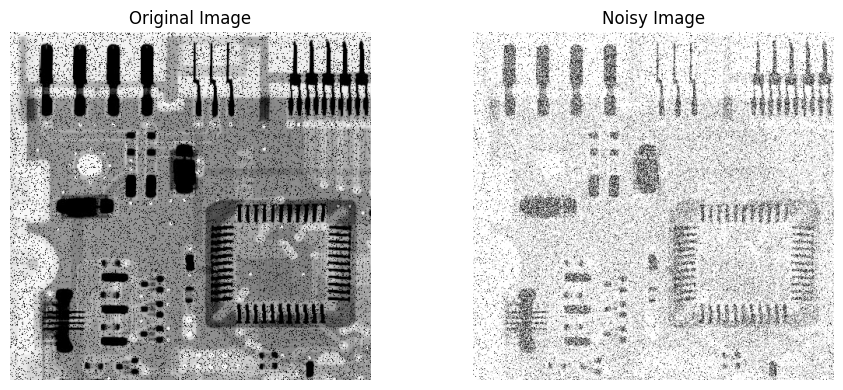

In [21]:
def add_gaussian_noise(img,mean,sigma): # Sigma -> Standard deviation
    gauss = np.random.normal(img,mean,img.shape).astype(np.uint8)
    noisy_img = cv2.add(img,gauss)
    return noisy_img

noisy_image = add_gaussian_noise(img, np.mean(img), np.std(img))

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.axis("off")
plt.tight_layout()
plt.imshow(img,cmap = "gray")

plt.subplot(1,2,2)
plt.title('Noisy Image')
plt.axis("off")
plt.tight_layout()
plt.imshow(noisy_image,cmap = "gray")

plt.show()
